In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 4.8 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

In [ ]:
import patoolib

In [ ]:
patoolib.extract_archive("/content/archive (3).zip")

patool: Extracting /content/archive (3).zip ...
patool: running /usr/bin/7z x -o./Unpack_3pzko6sj -- "/content/archive (3).zip"
patool: ... /content/archive (3).zip extracted to `PandasBears'.


'PandasBears'

In [ ]:
from PIL import Image
import os, os.path
import numpy as np
from keras.preprocessing import image
from PIL import Image
from tensorflow.keras.preprocessing import image
import glob
image_list = []
for filename in glob.glob('/content/PandasBears/Train/Pandas/*.jpeg'): #assuming gif
    im=Image.open(filename)
    image_list.append(image.img_to_array(im))
x_train=np.array(image_list)
x_train.shape

(250, 256, 256, 3)

In [ ]:
image_list1 = []
for filename in glob.glob('/content/PandasBears/Test/Pandas/*.jpeg'): #assuming gif
    im1=Image.open(filename)
    image_list1.append(image.img_to_array(im1))
x_test=np.array(image_list1)
x_test.shape

(50, 256, 256, 3)

In [ ]:
import matplotlib.pyplot as plt
def draw(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

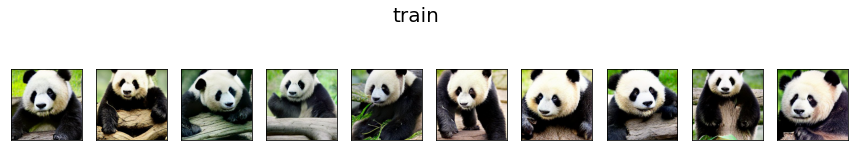

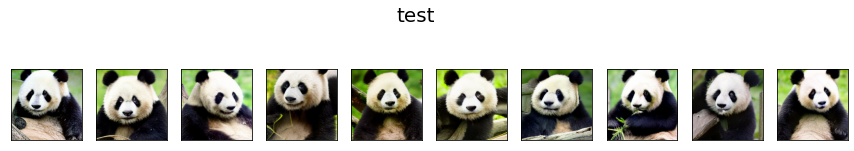

In [ ]:
draw(x_train, title="train")
draw(x_test, title="test")

In [ ]:
# input_layer = Input(shape=(256, 256, 3), name="INPUT")
# x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# encoded = MaxPooling2D((2, 2), name="CODE")(x)

# x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2,2))(x)
# decoded = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)



In [ ]:
# ##encoded to 16
input_layer = Input(shape=(256, 256, 3), name="INPUT")
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)


x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)
# ae = Model(input_layer, decoded)
# ae.summary()
print(encoded.shape)
decoded.shape

In [ ]:
ae = Model(input_layer, decoded)
ae.compile(optimizer='adam', loss='mse')
ae.summary()
x_train.shape

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584   

(250, 256, 256, 3)

In [ ]:
encoder = Model(input_layer, encoded)
decoder = Model(encoded, decoded)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf

In [ ]:
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.util import random_noise


In [ ]:
noise = np.random.normal(30,25,(x_train.shape[1:]))
noise.shape

(256, 256, 3)

In [ ]:
train_noise=[]
for i in range (len(x_train)):
  train_noise.append(x_train[i]+noise)
train_noise = np.array(train_noise)

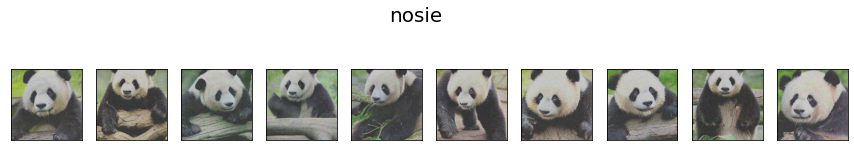

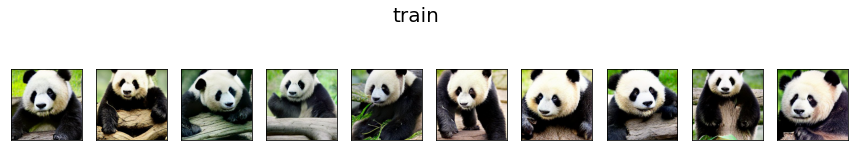

In [ ]:
draw(train_noise,title="nosie")
draw(x_train, title="train")

In [ ]:
test_noise=[]
for i in range (len(x_test)):
  test_noise.append(x_test[i]+noise)
test_noise = np.array(test_noise)

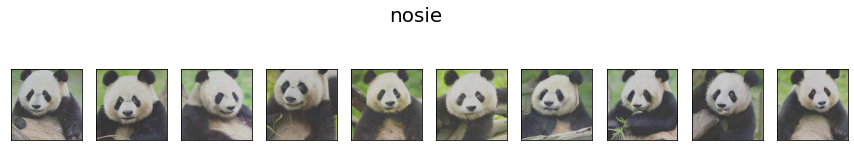

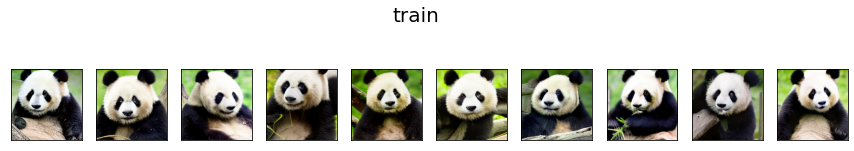

In [ ]:
draw(test_noise,title="nosie")
draw(x_test, title="train")

In [ ]:
ae.fit(train_noise, x_train,
                epochs=400,
                batch_size=32,
                shuffle=True,
                validation_data=(test_noise, x_test))

Epoch 1/400
8/8 [==============================] - 10s 244ms/step - loss: 11840.1279 - val_loss: 7163.1543
Epoch 2/400
8/8 [==============================] - 1s 93ms/step - loss: 4723.2256 - val_loss: 2733.9307
Epoch 3/400
8/8 [==============================] - 1s 93ms/step - loss: 2254.4927 - val_loss: 1996.4489
Epoch 4/400
8/8 [==============================] - 1s 91ms/step - loss: 1917.2114 - val_loss: 1753.9760
Epoch 5/400
8/8 [==============================] - 1s 93ms/step - loss: 1582.1908 - val_loss: 1468.5227
Epoch 6/400
8/8 [==============================] - 1s 90ms/step - loss: 1418.1533 - val_loss: 1374.8605
Epoch 7/400
8/8 [==============================] - 1s 94ms/step - loss: 1286.4227 - val_loss: 1217.5195
Epoch 8/400
8/8 [==============================] - 1s 95ms/step - loss: 1160.6018 - val_loss: 1114.7048
Epoch 9/400
8/8 [==============================] - 1s 93ms/step - loss: 1072.2660 - val_loss: 1039.1564
Epoch 10/400
8/8 [==============================] - 1s 90ms/s

In [ ]:
encoded_img1 = encoder.predict(test_noise)

2/2 [==============================] - 0s 11ms/step


In [ ]:
reconstructed = decoder.predict(encoded_img1)

2/2 [==============================] - 0s 13ms/step


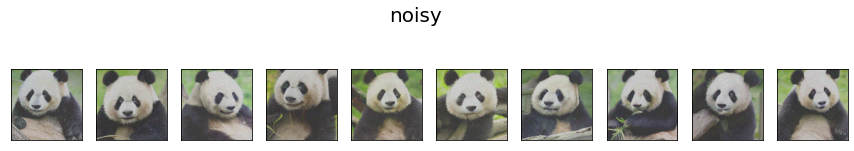

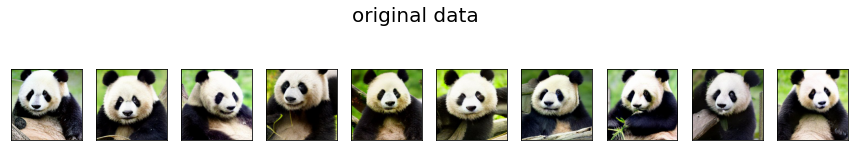

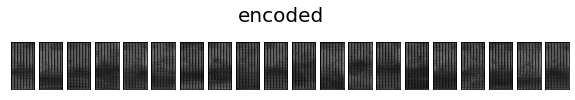

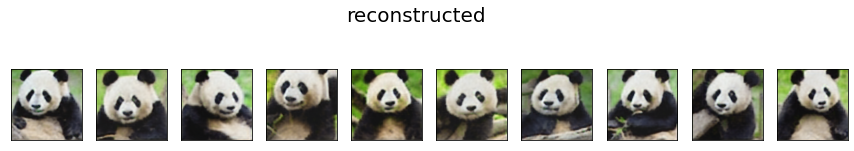

In [ ]:
draw(test_noise, title="noisy")
draw(x_test, title="original data")
show_data(encoded_img1, height=128, width=64, title="encoded")
draw(reconstructed, title="reconstructed")

In [ ]:
ae.evaluate(test_noise,x_test)

2/2 [==============================] - 0s 32ms/step - loss: 290.9663


290.9662780761719

In [ ]:
noise1 = np.random.normal(30,25,(encoded_img1.shape[1:]))
en = encoder.predict(x_test) + noise1

2/2 [==============================] - 0s 11ms/step


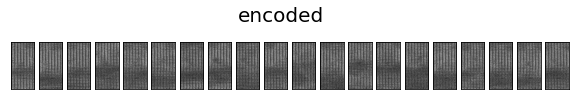

In [ ]:
show_data(en, height=128, width=64, title="encoded")

2/2 [==============================] - 0s 13ms/step


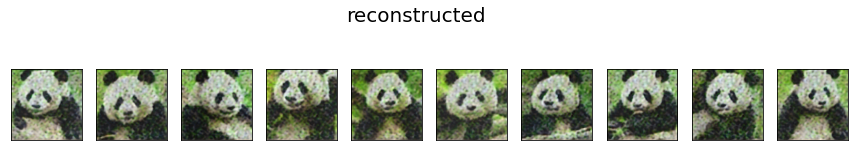

In [ ]:
reconstruct1 = decoder.predict(en)
draw(reconstruct1, title="reconstructed")

In [ ]:
image_l = []
for filename in glob.glob('/content/PandasBears/Test/Bears/*.jpeg'): #assuming gif
    imaa=Image.open(filename)
    image_l.append(image.img_to_array(imaa))
outside_test = np.array(image_l)
outside_test.shape

(50, 256, 256, 3)

In [ ]:
outside_noise=[]
for i in range (len(outside_test)):
  outside_noise.append(outside_test[i]+noise)
outside_noise = np.array(outside_noise)

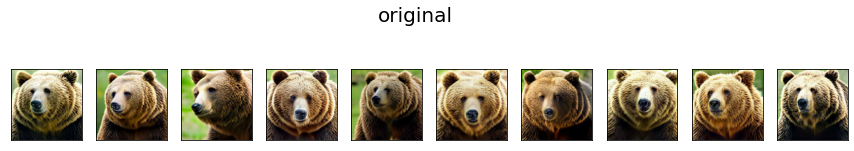

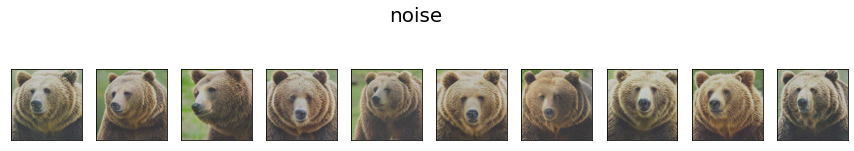

In [ ]:
draw(outside_test,title="original")
draw(outside_noise,title="noise")

In [ ]:
im = encoder.predict(outside_noise)
rec = decoder.predict(im)

2/2 [==============================] - 0s 14ms/step


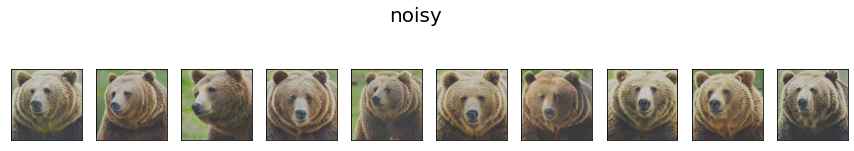

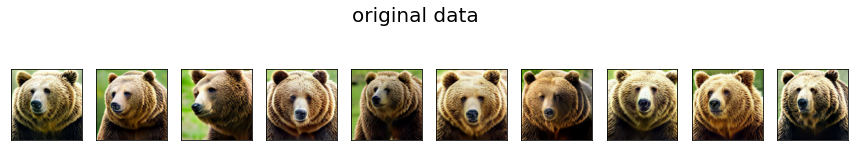

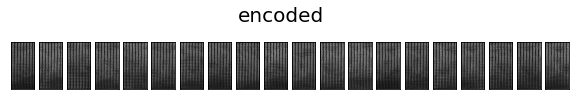

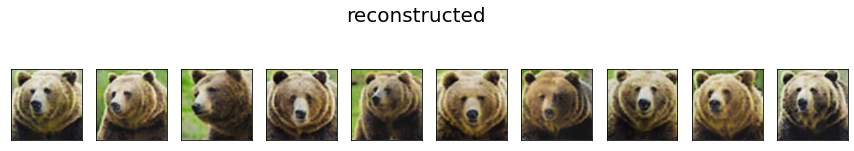

In [ ]:
draw(outside_noise, title="noisy")
draw(outside_test, title="original data")
show_data(im, height=128, width=64, title="encoded")
draw(rec, title="reconstructed")

In [ ]:
out_en = encoder.predict(outside_test)+ noise1

2/2 [==============================] - 0s 11ms/step


In [ ]:
re_out = decoder.predict(out_en)

2/2 [==============================] - 0s 13ms/step


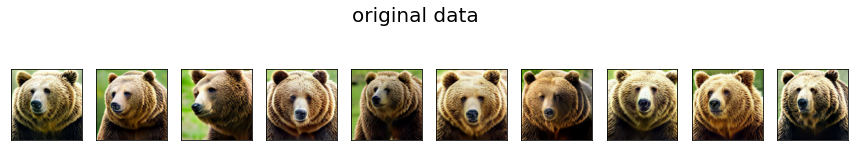

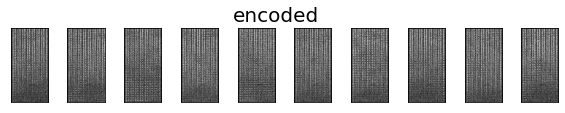

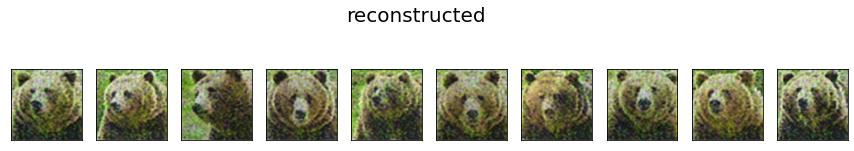

In [ ]:
draw(outside_test, title="original data")
show_data(out_en, height=128, width=64, title="encoded")
draw(re_out, title="reconstructed")